In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

**--------------------------------Import Dataset--------------------------------**

In [2]:
df = pd.read_csv("/kaggle/input/german-credit/german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [3]:
# drop unwanted column

df.drop('Unnamed: 0', axis = 1, inplace = True)

**--------------------------------EDA--------------------------------**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [5]:
df.duplicated().sum()

0

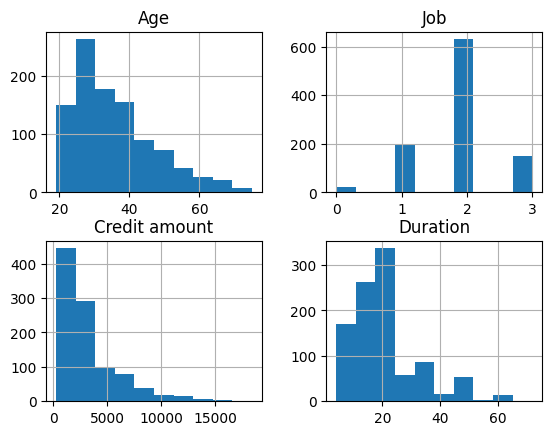

In [6]:
df.hist()
plt.show()

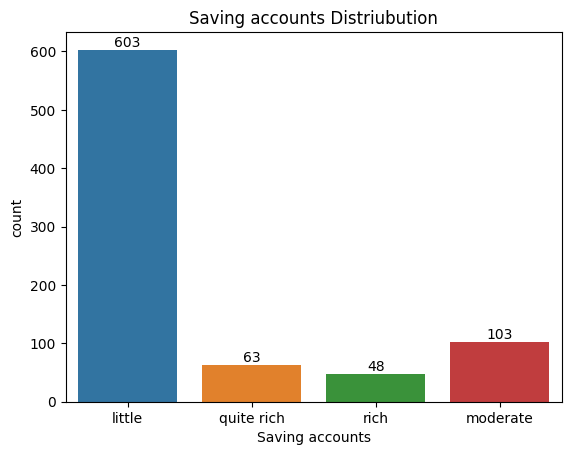

In [7]:
plt.title('Saving accounts Distriubution')
sns.countplot(x='Saving accounts', data=df)
for c in plt.gca().containers:
    plt.gca().bar_label(c)
plt.show()

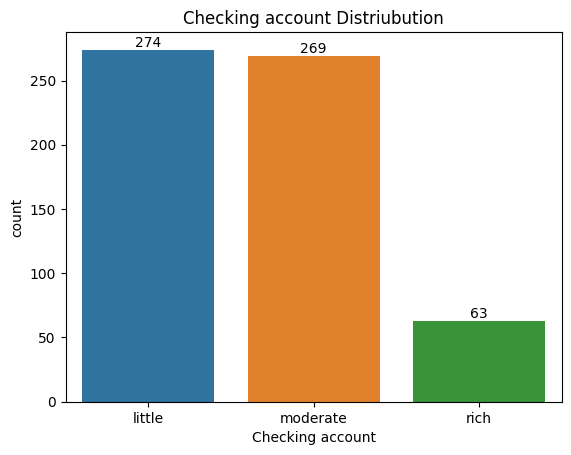

In [8]:
plt.title('Checking account Distriubution')
sns.countplot(x='Checking account', data=df)
for c in plt.gca().containers:
    plt.gca().bar_label(c)
plt.show()

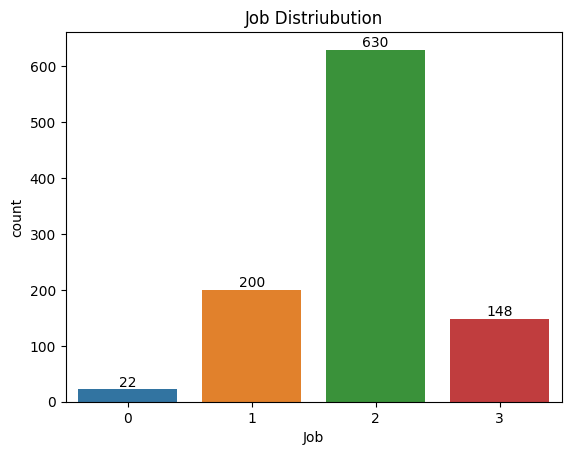

In [9]:
plt.title('Job Distriubution')
sns.countplot(x='Job', data=df)
for c in plt.gca().containers:
    plt.gca().bar_label(c)
plt.show()

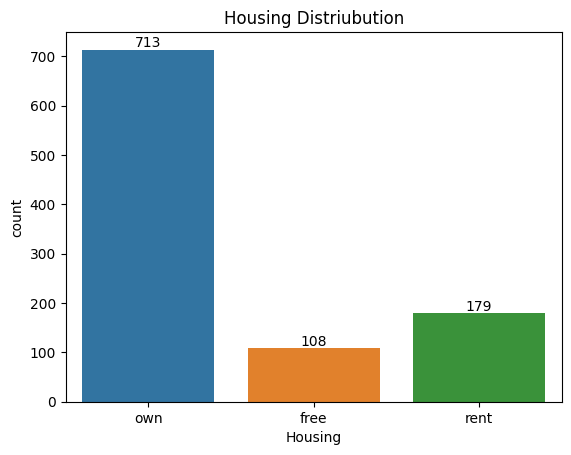

In [10]:
plt.title('Housing Distriubution')
sns.countplot(x='Housing', data=df)
for c in plt.gca().containers:
    plt.gca().bar_label(c)
plt.show()

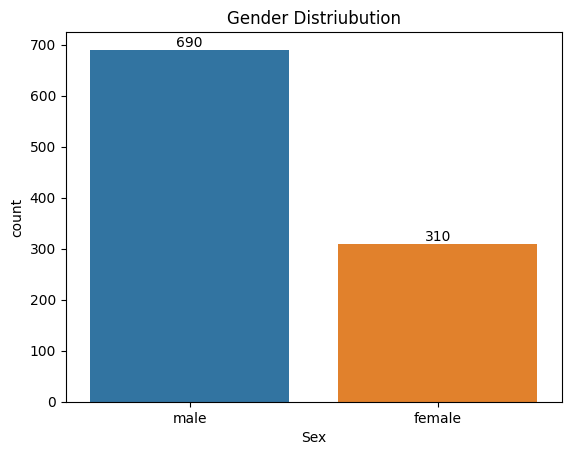

In [11]:
plt.title('Gender Distriubution')
sns.countplot(x='Sex', data=df)
for c in plt.gca().containers:
    plt.gca().bar_label(c)
plt.show()

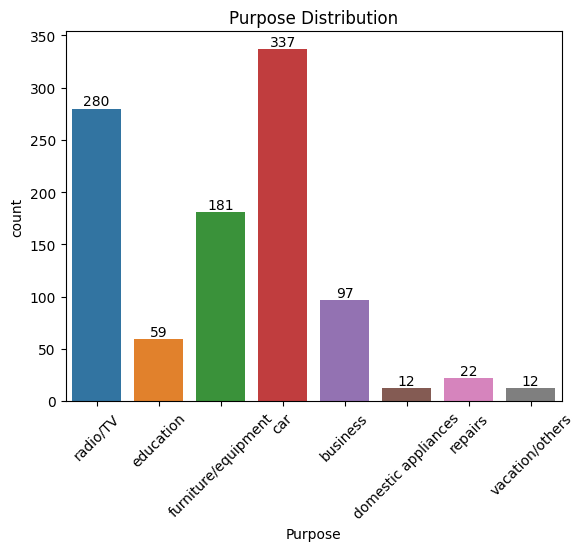

In [12]:
plt.title('Purpose Distribution')
sns.countplot(x='Purpose', data=df)
for c in plt.gca().containers:
    plt.gca().bar_label(c)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


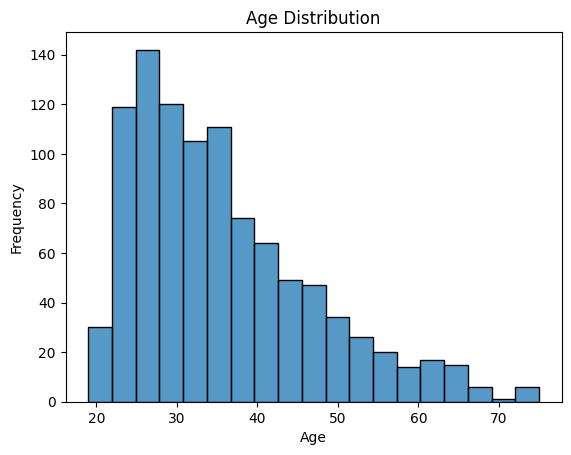

In [13]:
plt.title('Age Distribution')
sns.histplot(data=df, x='Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


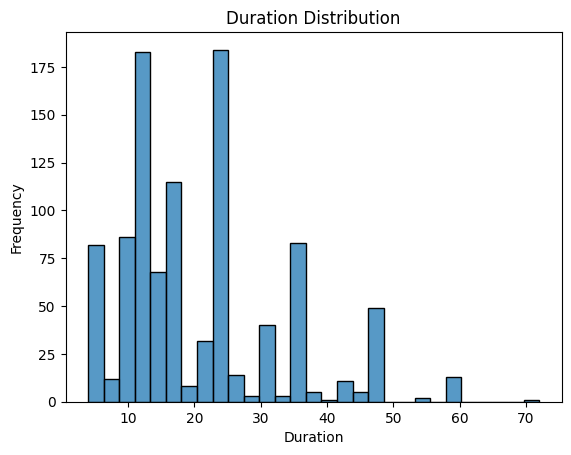

In [14]:
plt.title('Duration Distribution')
sns.histplot(data=df, x='Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

**--------------------------------Preprocessing--------------------------------**

In [15]:
# fill the null fields with modal values

modal_val = df['Saving accounts'].mode()[0]
df['Saving accounts'].fillna(modal_val, inplace=True)

modal_val = df['Checking account'].mode()[0]
df['Checking account'].fillna(modal_val, inplace=True)

<ipython-input-15-8a7988a70bd3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna(modal_val, inplace=True)
<ipython-input-15-8a7988a70bd3>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [17]:
# label encode the non decimal values

cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [18]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


In [19]:
# standardize the data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

**--------------------------------Unsupervised Model Creation--------------------------------**

In [20]:
# using K-Means clustering model with 2 clusters

model = KMeans(n_clusters=2)
model.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [21]:
# add clusters to the data

labels = model.labels_
df_clustered = pd.concat([df, pd.DataFrame({'Risk':labels})], axis = 1)
df_clustered.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,0
1,22,0,2,1,0,1,5951,48,5,1
2,49,1,1,1,0,0,2096,12,3,0
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,1


In [22]:
df_clustered.Risk.value_counts()

Risk
0    748
1    252
Name: count, dtype: int64

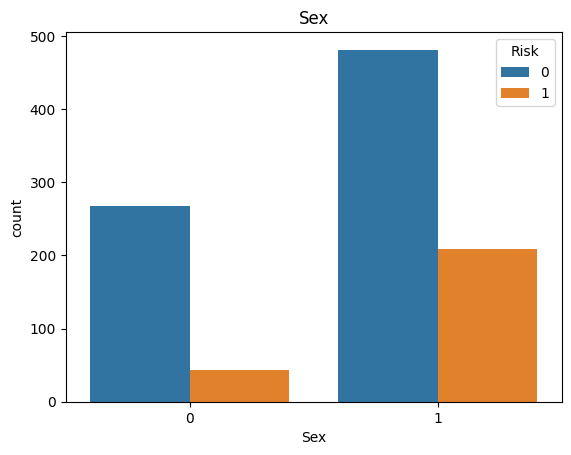

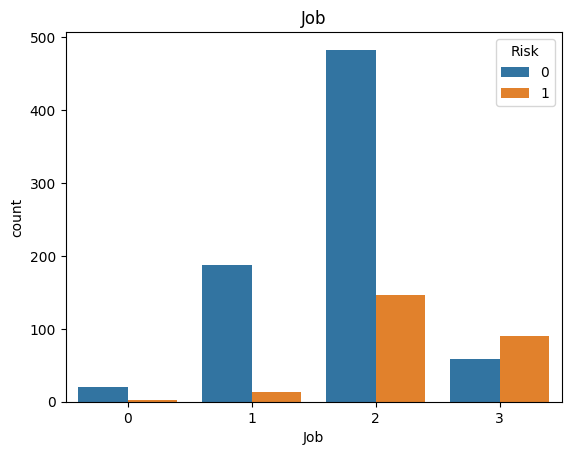

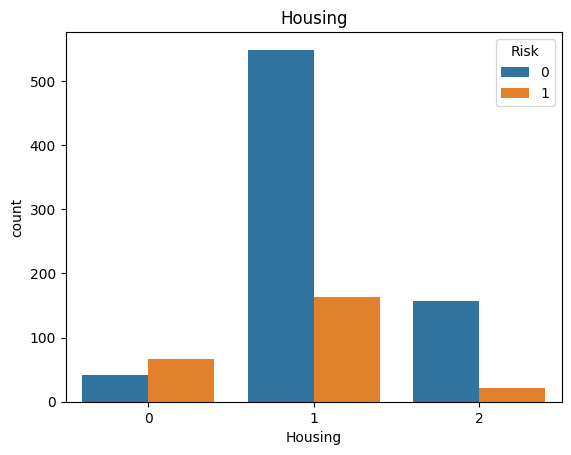

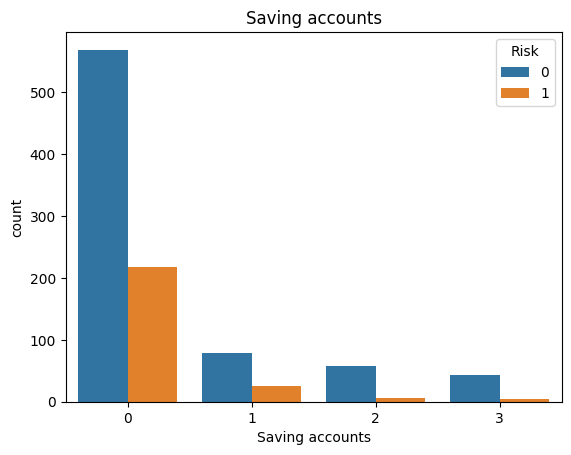

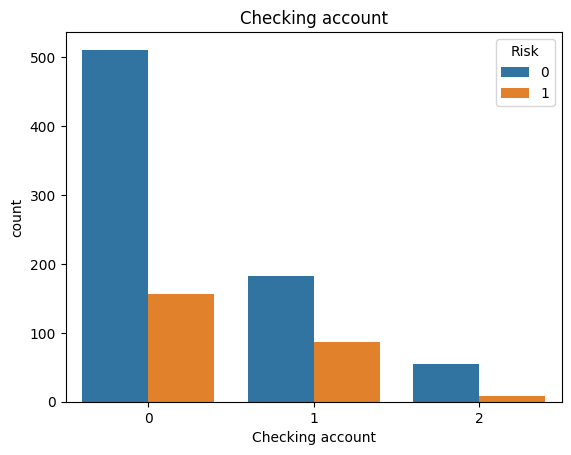

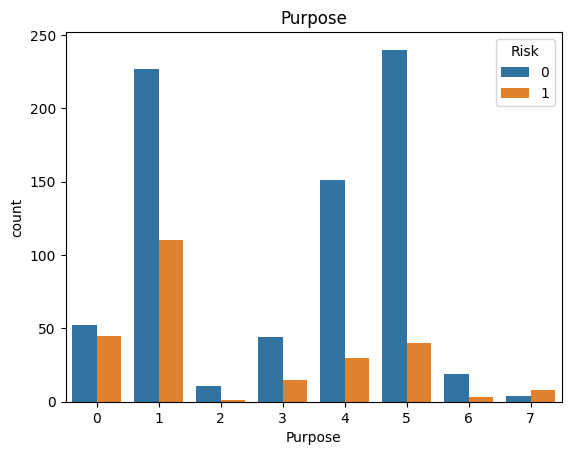

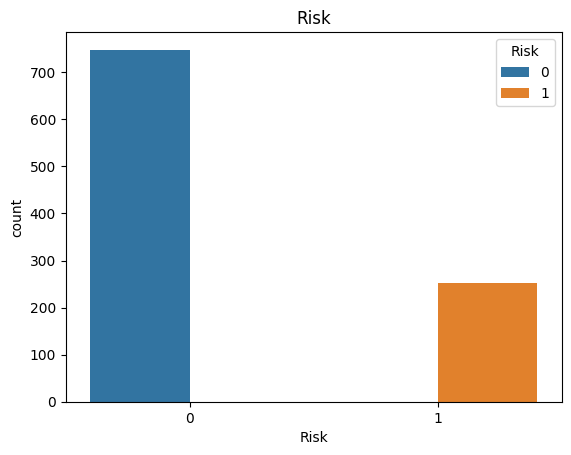

In [23]:
cols_list = ["Age", "Sex", "Job","Housing","Saving accounts", "Checking account", "Credit amount", "Duration", "Purpose", "Risk"]
col_list = ["Sex", "Job","Housing","Saving accounts", "Checking account", "Purpose", "Risk"]

data = df_clustered.loc[:, col_list]
for i in col_list:
    plt.figure()
    sns.countplot(x = i, data = data, hue="Risk")
    plt.title(i)

In [24]:
df_clustered[cols_list[:-1]] = scaler.fit_transform(df_clustered[cols_list[:-1]])

In [25]:
df_clustered.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,2.766456,0.670280,0.146949,-0.133710,-0.463409,-0.653831,-0.745131,-1.236478,1.073263,0
1,-1.191404,-1.491914,0.146949,-0.133710,-0.463409,1.001437,0.949817,2.248194,1.073263,1
2,1.183312,0.670280,-1.383771,-0.133710,-0.463409,-0.653831,-0.416562,-0.738668,0.061705,0
3,0.831502,0.670280,0.146949,-2.016956,-0.463409,-0.653831,1.634247,1.750384,0.567484,1
4,1.535122,0.670280,0.146949,-2.016956,-0.463409,-0.653831,0.566664,0.256953,-0.949853,1


In [26]:
dff = df_clustered.iloc[:]
dff.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,2.766456,0.670280,0.146949,-0.133710,-0.463409,-0.653831,-0.745131,-1.236478,1.073263,0
1,-1.191404,-1.491914,0.146949,-0.133710,-0.463409,1.001437,0.949817,2.248194,1.073263,1
2,1.183312,0.670280,-1.383771,-0.133710,-0.463409,-0.653831,-0.416562,-0.738668,0.061705,0
3,0.831502,0.670280,0.146949,-2.016956,-0.463409,-0.653831,1.634247,1.750384,0.567484,1
4,1.535122,0.670280,0.146949,-2.016956,-0.463409,-0.653831,0.566664,0.256953,-0.949853,1


**--------------------------------Train test split--------------------------------**

In [27]:
y = dff['Risk']
dff.drop(["Risk"], axis=1,inplace= True)
X = dff
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**--------------------------------Supervised Model Creation--------------------------------**

In [28]:
# use GridSearchCV to find the best hyperparameter for the model

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8]
}

gsv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
gsv.fit(X_train, y_train)

best_rf = gsv.best_estimator_
print("Best hyperparams:", best_rf)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best hyperparams: RandomForestClassifier(n_estimators=200, random_state=42)


**--------------------------------Evaluation--------------------------------**

In [29]:
y_pred = best_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred)}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[[235   5]
 [  4  56]]

Accuracy Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       240
           1       0.92      0.93      0.93        60

    accuracy                           0.97       300
   macro avg       0.95      0.96      0.95       300
weighted avg       0.97      0.97      0.97       300

